In [1]:
import os

import pandas as pd

from score import Scorer

# KG standalone agent

In [2]:
leagues = []
for exp in os.listdir("../final_results/kg_only"):
    leagues.append(pd.read_csv(os.path.join("../final_results/kg_only", exp, "scores.csv")))
league = pd.concat(leagues)
league = league.groupby("name").mean().sort_values("trueskill", ascending=False).reset_index()
league

,name,mu,sigma,trueskill
0,coacAI,37.012083,1.205784,33.394732
1,workerRushAI,32.177999,1.015866,29.130402
2,droplet,32.046013,1.015134,29.000610
3,mixedBot,31.485631,1.053819,28.324174
4,izanagi,30.251049,1.048142,27.106624
5,tiamat,27.830073,1.043764,24.698781
6,lightRushAI,26.430335,1.015859,23.382758
7,rdf_only.pt,27.532540,1.386789,23.372173
8,rojo,25.174782,1.005399,22.158584
9,guidedRojoA3N,23.137975,0.995099,20.152677


In [3]:
kg_only = league[league["name"] == "rdf_only.pt"]
kg_only_score = (kg_only["mu"] - 3 * kg_only["sigma"]).values[0]
kg_only_score

23.37217291325064

# Baseline

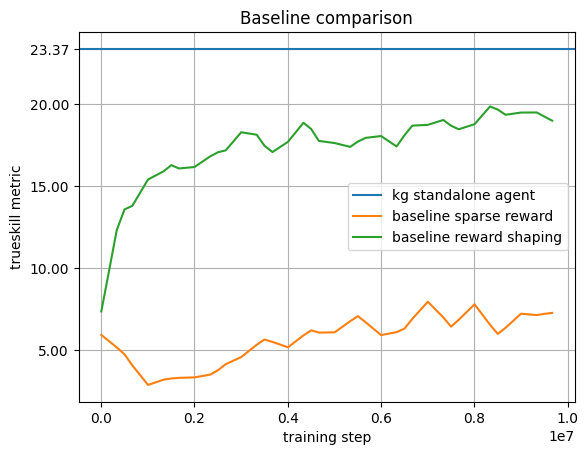

In [4]:
def new_base():
    return Scorer()\
        .add_flat_score(kg_only_score, "kg standalone agent")\
        .add_all_scores_dir("base", "baseline sparse reward")\
        .add_all_scores_dir("base_reward_shaping", "baseline reward shaping")

s = new_base().draw_avg("Baseline comparison", file="baseline")

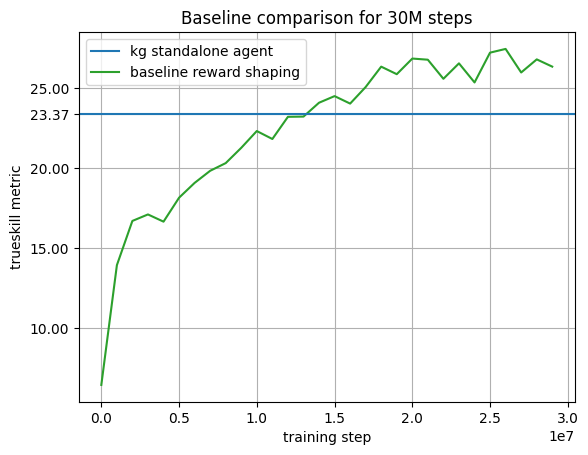

In [5]:
s = Scorer()\
    .add_flat_score(kg_only_score, "kg standalone agent")\
    .add_all_scores_dir("base_reward_shaping", "baseline reward shaping", runs="runs_30m")\
    .draw_avg("Baseline comparison for 30M steps", colors={"baseline reward shaping": "C2"}, file="baseline_30m")

# KG

## Reward shaping

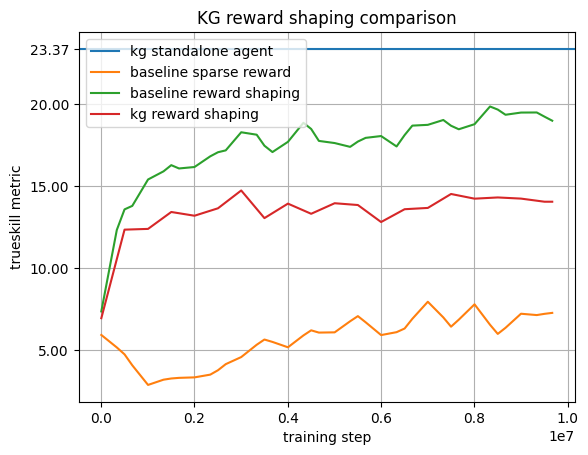

In [6]:
s = new_base()\
    .add_all_scores_dir("kg_reward_shaping", "kg reward shaping", experiments_path="../final_results")\
    .draw_avg("KG reward shaping comparison", file="kg_reward_shaping_1")

### Good/bad runs:

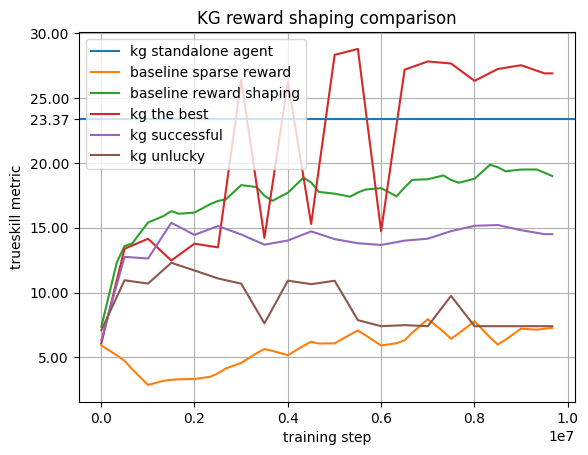

In [7]:
s = new_base()\
    .add_many_scores([
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__190__1732872058",
], "kg the best", directory="kg_reward_shaping", experiments_path="../final_results")\
    .add_many_scores([
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__66__1732216877",
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__130__1732630170",
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__170__1732818436",
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__210__1732919974",
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__250__1733102063",
], "kg successful", directory="kg_reward_shaping", experiments_path="../final_results")\
    .add_many_scores([
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__90__1732361405"
], "kg unlucky", directory="kg_reward_shaping", experiments_path="../final_results")\
    .draw_avg("KG reward shaping comparison", file="kg_reward_shaping_2")

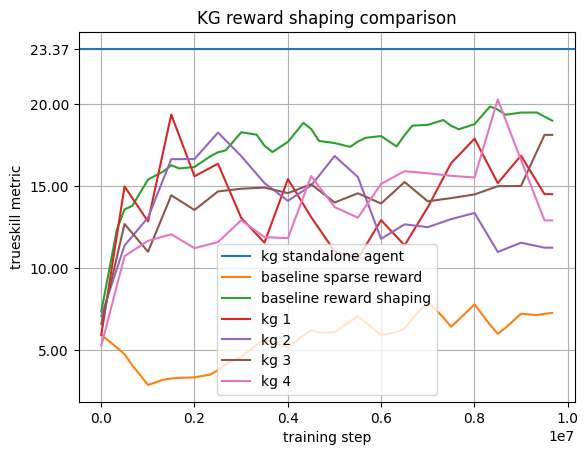

In [8]:
s = new_base()\
    .add_score("MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__66__1732216877", "kg 1", directory="kg_reward_shaping", experiments_path="../final_results")\
    .add_score("MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__130__1732630170", "kg 2", directory="kg_reward_shaping", experiments_path="../final_results")\
    .add_score("MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__170__1732818436", "kg 3", directory="kg_reward_shaping", experiments_path="../final_results")\
    .add_score("MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__210__1732919974", "kg 4", directory="kg_reward_shaping", experiments_path="../final_results")\
    .draw_avg("KG reward shaping comparison")

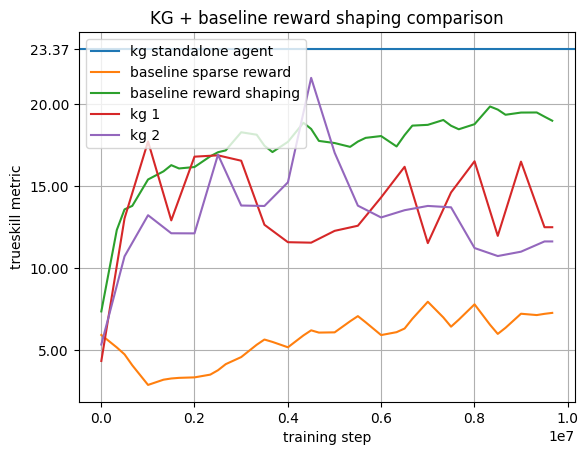

In [9]:
s = new_base()\
    .add_score("MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__230__1732988516", "kg 1", directory="kg_reward_shaping", experiments_path="../final_results", runs="runs_base_shaping")\
    .add_score("MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__240__1733017373", "kg 2", directory="kg_reward_shaping", experiments_path="../final_results", runs="runs_base_shaping")\
    .draw_avg("KG + baseline reward shaping comparison")

## Follow expert

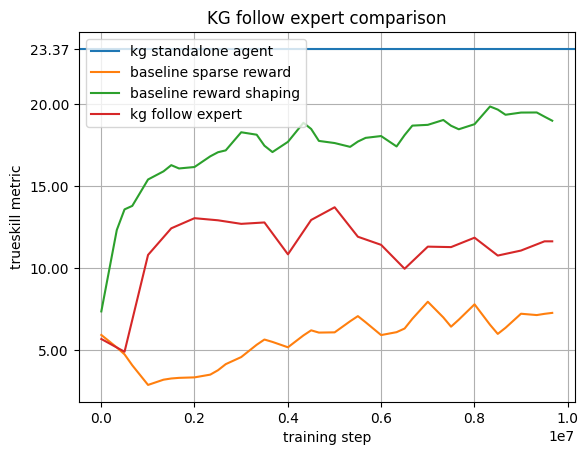

In [10]:
s = new_base()\
    .add_all_scores_dir("kg_follow_expert", "kg follow expert", experiments_path="../final_results")\
    .draw_avg("KG follow expert comparison", file="kg_follow_expert_1")

### Good/bad runs:

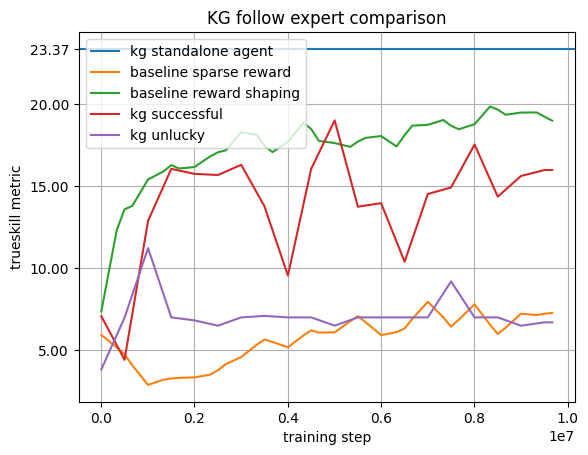

In [11]:
s = new_base()\
    .add_many_scores([
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__130__1732576264",
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__140__1732653424",
], "kg successful", directory="kg_follow_expert", experiments_path="../final_results")\
    .add_many_scores([
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__153__1732691230",
], "kg unlucky", directory="kg_follow_expert", experiments_path="../final_results")\
    .draw_avg("KG follow expert comparison", file="kg_follow_expert_2")

### Runs variance:

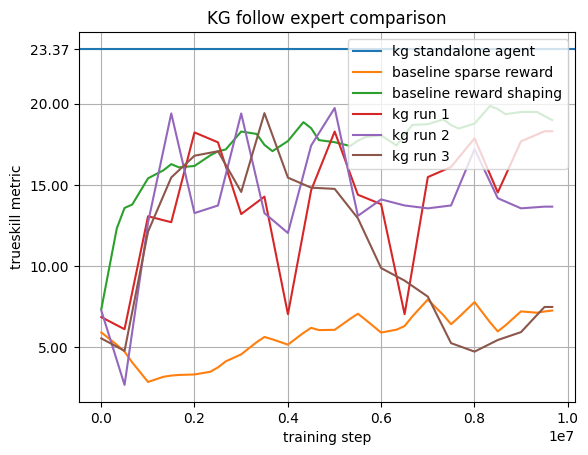

In [12]:
s = new_base()\
    .add_many_scores([
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__130__1732576264"
], "kg run 1", directory="kg_follow_expert", experiments_path="../final_results")\
    .add_many_scores([
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__140__1732653424"
], "kg run 2", directory="kg_follow_expert", experiments_path="../final_results")\
    .add_many_scores([
    "MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg12__155__1732781812"
], "kg run 3", directory="kg_follow_expert", experiments_path="../final_results")\
    .draw_avg("KG follow expert comparison", file="kg_follow_expert_3")

## Append vector

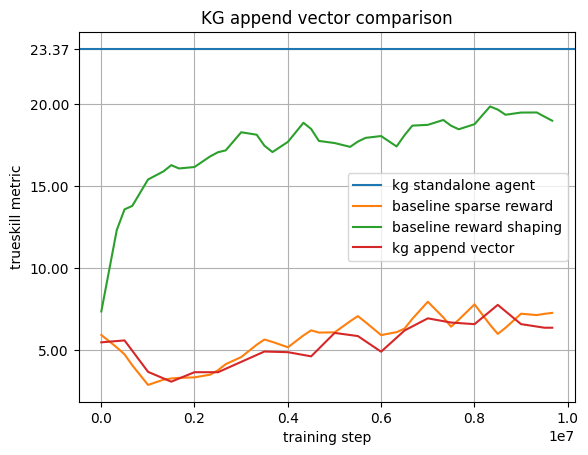

In [13]:
s = new_base()\
    .add_all_scores_dir("kg_append_vector", "kg append vector", experiments_path="../final_results")\
    .draw_avg("KG append vector comparison", file="kg_append_vector_1")

## All

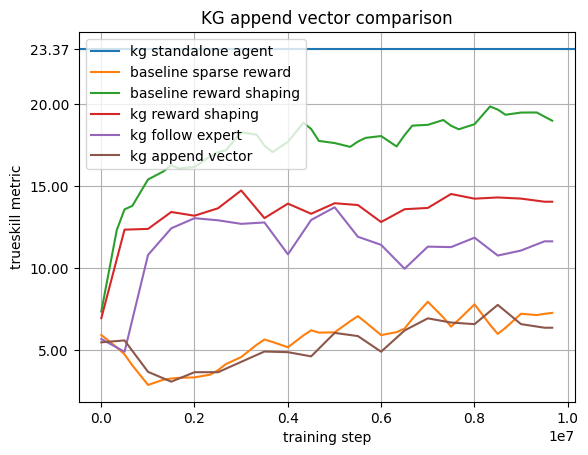

In [14]:
s = new_base()\
    .add_all_scores_dir("kg_reward_shaping", "kg reward shaping", experiments_path="../final_results")\
    .add_all_scores_dir("kg_follow_expert", "kg follow expert", experiments_path="../final_results")\
    .add_all_scores_dir("kg_append_vector", "kg append vector", experiments_path="../final_results")\
    .draw_avg("KG append vector comparison", file="kg_all")